In [3]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from keras.models import load_model
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [4]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('./dataset/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'Fist': 0, 'Nothing': 1, 'Palm': 2, 'Swing': 3, 'Thumb': 4, 'Yo': 5}

In [5]:
reverselookup

{0: 'Fist', 1: 'Nothing', 2: 'Palm', 3: 'Swing', 4: 'Thumb', 5: 'Yo'}

In [6]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset

for j in os.listdir('./dataset/'):
    if not j.startswith('.'): # Again avoid hidden folders
        count = 0 # To tally images of a given gesture
        for k in os.listdir('./dataset/' + str(j) + '/'):
            # Loop over the images
            img = Image.open('./dataset/' + str(j)+ '/' + k).convert('L')
                                # Read in and convert to greyscale
            img = img.resize((400, 400))
            arr = np.array(img)
            x_data.append(arr) 
            count = count + 1
        y_values = np.full((count, 1), lookup[str(j)])
        y_data.append(y_values)
        datacount = datacount + count
        
x_data = np.array(x_data, dtype = 'float32')
y_data = np.concatenate(y_data).ravel()


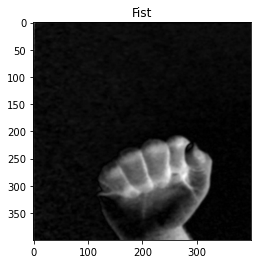

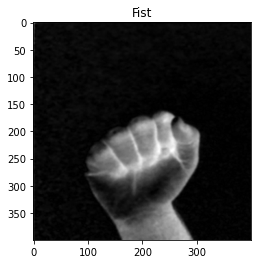

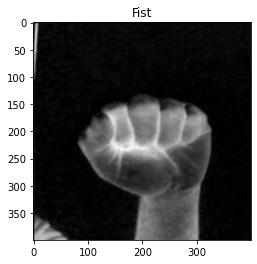

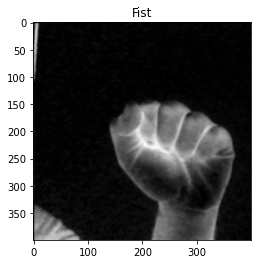

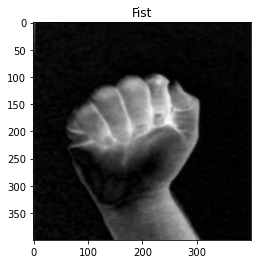

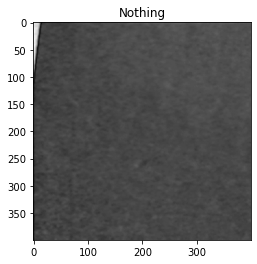

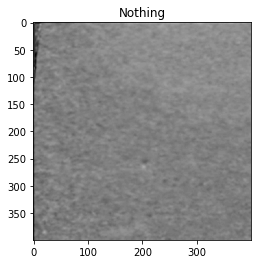

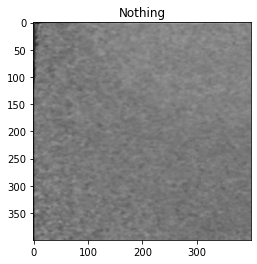

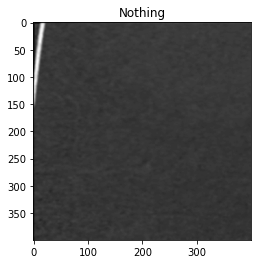

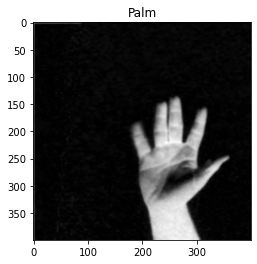

In [7]:
for i in range(10):    
    plt.imshow(x_data[i*50],cmap='gray')
    plt.title(reverselookup[y_data[i*50]])
    plt.show()

In [8]:
#Saving files so don't have to compute next time
np.save("X_DATA.npy",x_data)
np.save("Y_DATA.npy",y_data)

In [9]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [10]:
x_data = x_data.reshape((datacount, 400, 400, 1))
x_data /= 255

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [15]:
#Saving files so don't have to compute next time
np.save("X_TRAIN.npy",x_train)
np.save("Y_TRAIN.npy",y_train)
np.save("X_TEST.npy",x_test)
np.save("Y_TEST.npy",y_test)
np.save("X_VALIDATE",x_validate)
np.save("Y_VALIDATE",y_validate)

In [16]:
#To load saved data
x_train = np.load("X_TRAIN.npy")
y_train = np.load("Y_TRAIN.npy")
x_test = np.load("X_TEST.npy")
y_test = np.load("Y_TEST.npy")
x_validate = np.load("X_VALIDATE.npy")
y_validate = np.load("y_validate.npy")

In [17]:
from keras import layers
from keras import models

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(400, 400,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [19]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1, validation_data=(x_validate, y_validate),callbacks=[callback,])

Train on 1160 samples, validate on 145 samples
Epoch 1/20
1160/1160 [==============================] - 29s 25ms/step - loss: 1.1571 - accuracy: 0.5819 - val_loss: 0.6426 - val_accuracy: 0.8207
Epoch 2/20
1160/1160 [==============================] - 28s 24ms/step - loss: 0.3257 - accuracy: 0.9121 - val_loss: 0.3152 - val_accuracy: 0.9034
Epoch 3/20
1160/1160 [==============================] - 28s 24ms/step - loss: 0.1293 - accuracy: 0.9534 - val_loss: 0.2056 - val_accuracy: 0.9310
Epoch 4/20
1160/1160 [==============================] - 30s 26ms/step - loss: 0.1148 - accuracy: 0.9698 - val_loss: 0.1497 - val_accuracy: 0.9655
Epoch 5/20
1160/1160 [==============================] - 27s 23ms/step - loss: 0.0134 - accuracy: 0.9948 - val_loss: 0.7266 - val_accuracy: 0.7793
Epoch 6/20
1160/1160 [==============================] - 27s 23ms/step - loss: 0.0629 - accuracy: 0.9802 - val_loss: 0.0381 - val_accuracy: 0.9793
Epoch 7/20
1160/1160 [==============================] - 27s 23ms/step - loss:

In [33]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

145/145 [==============================] - 1s 5ms/step
Accuracy:0.9793103337287903


In [34]:
model.save("New_model.h5")

In [35]:
model = load_model("New_model.h5")

In [36]:
for i in range(10):
    print(reverselookup[np.argmax(model.predict(x_test)[i*2])])

Thumb
Palm
Fist
Yo
Fist
Fist
Thumb
Nothing
Yo
Palm


In [37]:
for i in range(10):
    print(reverselookup[(np.argmax(y_test[i*2]))])

Thumb
Palm
Fist
Yo
Fist
Fist
Thumb
Nothing
Yo
Palm
